In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm

In [6]:
df= pd.read_csv('c:/bd092_data/ozone.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [9]:
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [12]:
df.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [14]:
x = df[['Temp', 'Solar.R', 'Wind']]
y = df['Ozone']

In [17]:
x1 = sm.add_constant(x, has_constant='add')
x1

,const,Temp,Solar.R,Wind
0,1.0,67,190.000000,7.4
1,1.0,72,118.000000,8.0
2,1.0,74,149.000000,12.6
3,1.0,62,313.000000,11.5
4,1.0,56,185.931507,14.3
...,...,...,...,...
148,1.0,70,193.000000,6.9
149,1.0,77,145.000000,13.2
150,1.0,75,191.000000,14.3
151,1.0,76,131.000000,8.0


In [19]:
multi_model = sm.OLS(y,x1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     45.85
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           4.73e-21
Time:                        20:44:14   Log-Likelihood:                -680.14
No. Observations:                 153   AIC:                             1368.
Df Residuals:                     149   BIC:                             1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.2232     18.883     -2.024      0.045     -75.537      -0.909
Temp           1.2413      0.209      5.937      0.000       0.828       1.654
Solar.R        0.0577      0.020      2.883      0.005       0.018       0.097
Wind          -2.7173      0.543     -5.006      0.000      -3.790      -1.645
==============================================================================
Omnibus:                       50.473   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.388
Skew:                           1.378   Prob(JB):                     1.61e-27
Kurtosis:                       6.429   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

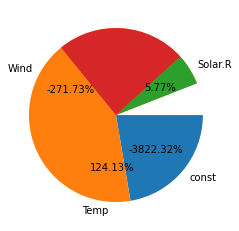

In [23]:
cat = multi_model.params.sort_values(ascending=True)
import matplotlib.pyplot as plt
plt.pie(cat, labels=cat.index, autopct='%.2f%%')
plt.show()

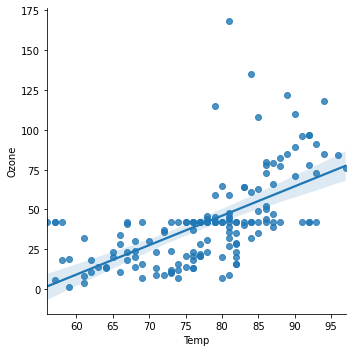

In [24]:
import seaborn as sns
sns.lmplot(y='Ozone', x='Temp', data=df)

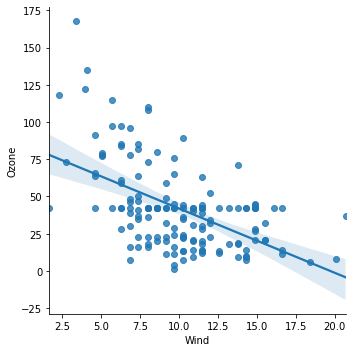

In [25]:
sns.lmplot(y='Ozone', x='Wind', data=df)

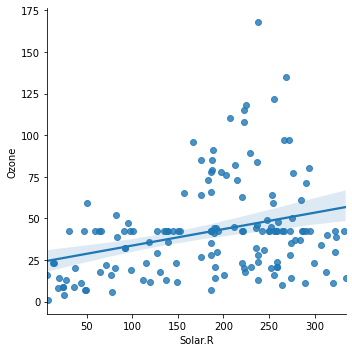

In [26]:
sns.lmplot(y='Ozone', x='Solar.R', data=df)

# 칼럼 이름 바꾸기

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('c:/bd092_data/NewOnlineRetail.csv')
df.head()
df = df.rename(columns={'InvoiceNo':'Invoice'})
df
df.rename(index={3:5}, inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
5,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
63670,C541589,79323W,WHITE CHERRY LIGHTS,-8,1/19/2011 14:44,6.75,15831.0,United Kingdom
63671,541590,84580,MOUSE TOY WITH PINK T-SHIRT,4,1/19/2011 14:50,3.75,13310.0,United Kingdom
63672,541590,22295,HEART FILIGREE DOVE LARGE,12,1/19/2011 14:50,1.65,13310.0,United Kingdom
63673,541590,85231B,CINAMMON SET OF 9 T-LIGHTS,12,1/19/2011 14:50,0.85,13310.0,United Kingdom


In [26]:
df.rename(columns={'Quantity':'Q'}, inplace=True)
df


,Invoice,StockCode,Description,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,2.75,17850.0
5,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...,...
63670,C541589,79323W,WHITE CHERRY LIGHTS,1/19/2011 14:44,6.75,15831.0
63671,541590,84580,MOUSE TOY WITH PINK T-SHIRT,1/19/2011 14:50,3.75,13310.0
63672,541590,22295,HEART FILIGREE DOVE LARGE,1/19/2011 14:50,1.65,13310.0
63673,541590,85231B,CINAMMON SET OF 9 T-LIGHTS,1/19/2011 14:50,0.85,13310.0


In [28]:
df.loc[10:11, ['StockCode', 'Description']]

,StockCode,Description
10,22745,POPPY'S PLAYHOUSE BEDROOM
11,22748,POPPY'S PLAYHOUSE KITCHEN


In [30]:
df.iloc[3, [3,5]]

InvoiceDate    12/1/2010 8:26
CustomerID              17850
Name: 5, dtype: object

In [35]:
df.groupby('CustomerID').corr()

,,UnitPrice
CustomerID,,
12346.0,UnitPrice,NaN
12347.0,UnitPrice,1.0
12348.0,UnitPrice,1.0
12356.0,UnitPrice,1.0
12359.0,UnitPrice,1.0
...,...,...
18256.0,UnitPrice,1.0
18259.0,UnitPrice,1.0
18260.0,UnitPrice,1.0
